Use TkAgg backend for matplotlib.



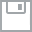
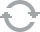
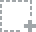
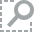
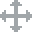
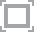
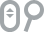
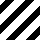
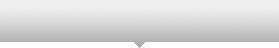
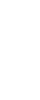
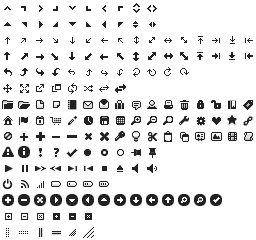
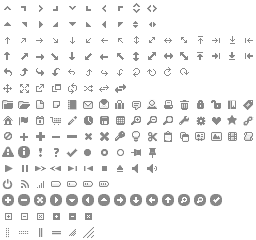
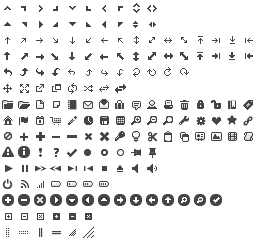
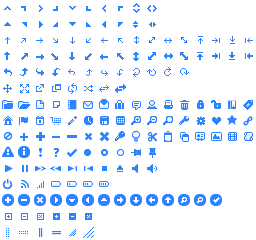
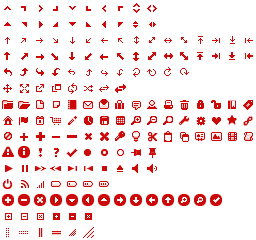
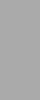
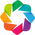
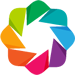

In [1]:
%matplotlib tk
import loom
import logging
loom.set_logging(
    logger_name='loom',
    logging_level=logging.INFO,
    logging_stream=None,
    logging_file_name='logs/loom_test.log'
)

from bokeh.plotting import show
from bokeh.io import save
from bokeh.io import output_notebook

from loom.bokeh_plot import get_spectral_network_bokeh_plot

output_notebook()

Load a configuration file.

In [2]:
d = loom.api.SpectralNetworkData(config_file_path='config/default.ini')

INFO:loom:Loading configuration from config/default.ini...
INFO:loom:Finished loading configuration from config/default.ini.


Shows the loaded configuration.

In [3]:
d.config.data

{'accuracy': 1e-06,
 'branch_points': None,
 'casimir_differentials': '{2: v_2, 3: v_3 + z^2}',
 'description': 'Argyres-Douglas fixed point of pure SU(3)',
 'differential_parameters': '{v_2 = 1.0, v_3 = 1.0}',
 'irregular_punctures': '[oo]',
 'mass_limit': 10.0,
 'mt_params': None,
 'num_of_iterations': 5,
 'num_of_steps': 5000,
 'phase': [0.01, 3.14, 8],
 'plot_range': [[-5, 5], [-5, 5]],
 'ramification_point_finding_method': 'system_of_eqs',
 'ramification_points': '[(-sqrt(1/3*(-3+(2*I)/sqrt(3))), -(I/sqrt(3))), (sqrt(1/3*(-3+(2*I)/sqrt(3))), -(I/sqrt(3))), (-sqrt(1/3*(-3-(2*I)/sqrt(3))), I/sqrt(3)), (sqrt(1/3*(-3-(2*I)/sqrt(3))), I/sqrt(3))]',
 'regular_punctures': '[]',
 'representation': '1',
 'root_system': 'A2',
 'size_of_bp_neighborhood': None,
 'size_of_large_step': None,
 'size_of_puncture_cutoff': None,
 'size_of_small_step': None}

How to change the current configuration.

In [4]:
d.config['num_of_steps'] = 1000
d.config['num_of_iterations'] = 3
d.config['phase'] = 1.0
d.config['mass_limit'] = 3.0
d.config['ramification_point_finding_method'] = 'from_branch_points'
d.config['branch_points'] = '[-sqrt(1/3*(-3+(2*I)/sqrt(3))), sqrt(1/3*(-3+(2*I)/sqrt(3))), -sqrt(1/3*(-3-(2*I)/sqrt(3))), sqrt(1/3*(-3-(2*I)/sqrt(3)))]'

Generate spectral networks according to the configuration.

In [5]:
d.generate()

INFO:loom:Started @ 2016-04-29 10:51:25
INFO:loom:Ramification point finding method: from_branch_points
INFO:loom:Calculating ramification points of the Seiberg-Witten curve in the first fundamental rep.
INFO:loom:The z-plane has not been rotated.
INFO:loom:Some branch points or punctures are vertically aligned.
Need to rotate the z-plane.

INFO:loom:Will try rotating z-plane in increments of pi/2
INFO:loom:The z-plane has been rotated 1 times.
Current rotation of the z-plane: I

INFO:loom:Some branch points or punctures are vertically aligned.
Need to rotate the z-plane.

INFO:loom:Will try rotating z-plane in increments of pi/3
INFO:loom:The z-plane has been rotated 1 times.
Current rotation of the z-plane: exp(I*pi/3)

INFO:loom:All branch points and punctures are sufficiently separated horizontally.
Will not rotate z-plane any more.

INFO:loom:Analyzing a ramification point at z = (-0.975922662037-0.345096666087j), x=(-6.4413680535e-09-0.57735026507j).
INFO:loom:Analyzing a ramific

Displays the bokeh plot of the spectral network.

In [6]:
plot_range = [[-3, 3], [-3, 3]]

f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)

show(f)

Save spectral network data in files.

In [7]:
d.save(data_dir='data/example')

INFO:loom:Make a directory data/example to save data.
INFO:loom:Saving configuration to data/example/config.ini.
INFO:loom:Finished saving configuration to data/example/config.ini.
INFO:loom:Saving data to data/example/sw_data.json.
INFO:loom:Saving data to data/example/data_0.json.
INFO:loom:Finished saving data to data/example.


Load spectral networks from saved data.

In [8]:
d = loom.api.SpectralNetworkData(data_dir='data/example')

INFO:loom:Opening data directory "data/example"...
INFO:loom:Seiberg-Witten curve in the 1st fundamental representation:
(note: \lambda = x dz)
v_{2} x + v_{3} + x^{3} + z^{2} = 0
(numerically
x^{3} + 1.0 x + z^{2} \left(-0.5 + 0.86602540378443864676 i\right) + 1.0=0
)
INFO:loom:Seiberg-Witten differential:
x dz
(numerically
x \left(0.5 + 0.86602540378443864676 i\right) dz
)
INFO:loom:ramification point #0: z = (-0.975922662037-0.345096666087j), x = (-6.4413680535e-09-0.57735026507j), i = 2.
INFO:loom:ramification point #1: z = (0.975922662037+0.345096666087j), x = (-6.4413680535e-09-0.57735026507j), i = 2.
INFO:loom:ramification point #2: z = (0.786823810611+0.67262548441j), x = (-6.4413680535e-09+0.57735026507j), i = 2.
INFO:loom:ramification point #3: z = (-0.786823810611-0.67262548441j), x = (-6.4413680535e-09+0.57735026507j), i = 2.
INFO:loom:irregular puncture #0 at z=oo
INFO:loom:Loading data/example/data_0.json...
INFO:loom:Finished loading data from data/example.


Extend spectral networks by additional steps, iterations, a new mass limit, or additional phases. 

In [9]:
d.extend(additional_n_steps=1000, new_mass_limit=10, additional_iterations=2, additional_phases=[1.0, 3.0, 3])

INFO:loom:Started @ 2016-04-29 10:52:51
INFO:loom:Extending spectral networks...
INFO:loom:Use CGAL to find intersections.
INFO:loom:Start iteration #1...
INFO:loom:Extending S-walls by 1000 steps with new mass limit 10.
INFO:loom:Growing S-wall #0...
INFO:loom:Determining the root type of S-wall #0...
INFO:loom:Growing S-wall #1...
INFO:loom:Determining the root type of S-wall #1...
INFO:loom:Growing S-wall #2...
INFO:loom:Determining the root type of S-wall #2...
INFO:loom:Growing S-wall #3...
INFO:loom:Determining the root type of S-wall #3...
INFO:loom:Growing S-wall #4...
INFO:loom:Determining the root type of S-wall #4...
INFO:loom:Growing S-wall #5...
INFO:loom:Determining the root type of S-wall #5...
INFO:loom:Growing S-wall #6...
INFO:loom:Determining the root type of S-wall #6...
INFO:loom:Growing S-wall #7...
INFO:loom:Determining the root type of S-wall #7...
INFO:loom:Growing S-wall #8...
INFO:loom:Determining the root type of S-wall #8...
INFO:loom:Growing S-wall #9...
I

Use the slider bar to change between spectral networks of different phases.

In [10]:
plot_range = [[-5, 5], [-5, 5]]
f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)
show(f)

Save the bokeh plot to an html file. (Ignore the warning message.)

In [11]:
from loom.bokeh_plot import get_spectral_network_bokeh_plot

plot_range = [[-5, 5], [-5, 5]]
p = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)
save(
    obj=p,
    filename='data/example.html',
    title='Spectral networks of an Argyres-Douglas theory',
)

/usr/local/lib/python2.7/dist-packages/bokeh/io.py:319: UserWarning: save() called but no resources was supplied and output_file(...) was never called, defaulting to resources.INLINE
  warnings.warn("save() called but no resources was supplied and output_file(...) was never called, defaulting to resources.INLINE")


Bokeh exports an plot only to a PNG format. To get a PDF plot of better quality, use matplotlib.

INFO:loom:Generating the plot of a spectral network @ theta = 1.0...
INFO:loom:
------------------------
phase : 1.0
------------------------
	--- Root System ---
alpha_4 : [-1, 0, 1]
ordered weight pairs : ['(mu_0, mu_2)']
alpha_5 : [0, -1, 1]
ordered weight pairs : ['(mu_1, mu_2)']
alpha_2 : [0, 1, -1]
ordered weight pairs : ['(mu_2, mu_1)']
alpha_3 : [-1, 1, 0]
ordered weight pairs : ['(mu_0, mu_1)']
alpha_0 : [1, -1, 0]
ordered weight pairs : ['(mu_1, mu_0)']
alpha_1 : [1, 0, -1]
ordered weight pairs : ['(mu_2, mu_0)']
	--- Weight System ---
mu_2 : [0, 0, 1]
mu_1 : [0, 1, 0]
mu_0 : [1, 0, 0]
	--- Branch Points ---
branch point #0	position : (-0.189098851426-1.0177221505j)
		root type : ['alpha_0']
		monodromy matrix : 
[[0 1 0]
 [1 0 0]
 [0 0 1]]
branch point #1	position : (0.189098851426+1.0177221505j)
		root type : ['alpha_1']
		monodromy matrix : 
[[0 0 1]
 [0 1 0]
 [1 0 0]]
branch point #2	position : (0.189098851426-1.0177221505j)
		root type : ['alpha_2']
		monodromy matrix : 

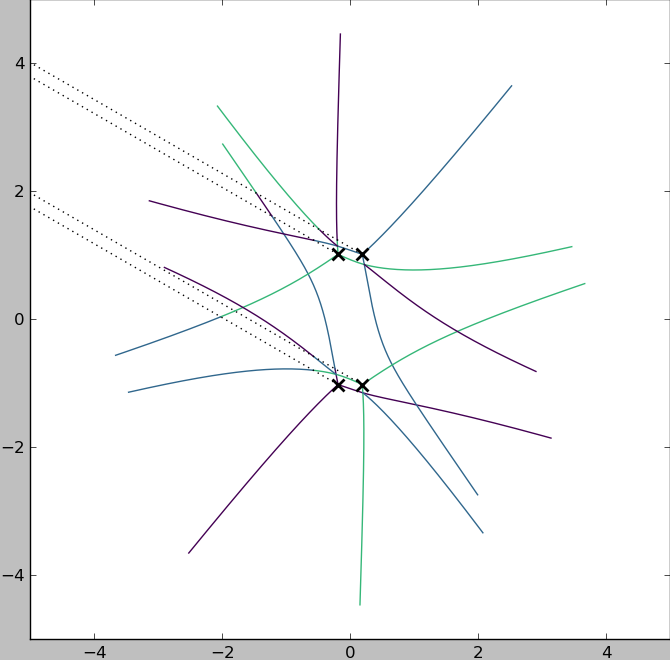

In [12]:
plot_range = [[-5, 5], [-5, 5]]
p = loom.api.make_spectral_network_plot(d, plot_range=plot_range)
p.figure

In [13]:
p.figure.savefig('data/example.pdf', bbox_inches='tight')